In [14]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [15]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [16]:

X_test.shape

(10000, 32, 32, 3)

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [51]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

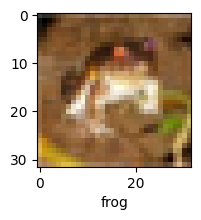

In [52]:
plot_sample(X_train,y_train,0)

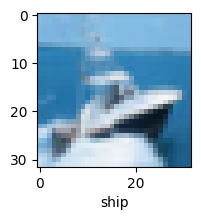

In [53]:
plot_sample(X_train,y_train,8)

Data Normalization

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
ann=models.Sequential([
                            layers.Flatten(input_shape=(32,32,3)),
                            layers.Dense(3000,activation='relu'),
                            layers.Dense(1000,activation='relu'),
                            layers.Dense(10,activation='sigmoid')
                             ])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5,verbose=1)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 60ms/step - accuracy: 0.3105 - loss: 1.9268
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.4204 - loss: 1.6429
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4581 - loss: 1.5487
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4767 - loss: 1.4887
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4902 - loss: 1.4446


In [12]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4927 - loss: 1.4378


[1.4448899030685425, 0.4860000014305115]

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.42      0.51      1000
           1       0.62      0.59      0.61      1000
           2       0.44      0.22      0.30      1000
           3       0.41      0.21      0.28      1000
           4       0.37      0.55      0.44      1000
           5       0.44      0.33      0.38      1000
           6       0.52      0.54      0.53      1000
           7       0.52      0.58      0.55      1000
           8       0.50      0.74      0.60      1000
           9       0.45      0.67      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



using cnn for model 

In [21]:
cnn=models.Sequential([
     layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(10,activation='softmax'),
                            
                             ])


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8519 - loss: 0.4366
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8649 - loss: 0.3890
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8677 - loss: 0.3830
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8666 - loss: 0.3834
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8801 - loss: 0.3562
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8780 - loss: 0.3610
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8886 - loss: 0.3250
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8862 - loss: 0.3299
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8893 - loss: 0.3291
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8910 - loss: 0.3214


In [ ]:
cnn.evaluate(X_test,y_test)

In [25]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

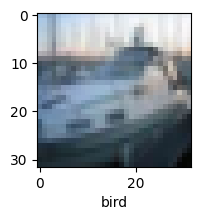

In [33]:
plot_sample(X_test,y_test,2)

In [40]:
y_pred = cnn.predict(X_test)
print(y_pred[:5])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[1.14453905e-10 1.21759076e-03 8.54238624e-06 9.98762012e-01
  2.94207985e-06 1.35417622e-07 1.04642979e-08 1.03665244e-07
  6.47609158e-06 2.21410505e-06]
 [9.68817353e-01 9.55359210e-05 2.95178482e-09 4.63636407e-10
  4.40997794e-15 4.21603768e-12 4.07484191e-17 3.89954282e-18
  2.91222446e-02 1.96482637e-03]
 [6.69192150e-03 1.51710600e-01 7.52333449e-07 8.38397284e-07
  2.01377054e-10 1.00296184e-07 3.29140413e-08 6.55706911e-09
  5.27113676e-01 3.14482093e-01]
 [9.94015396e-01 6.77413503e-09 2.36501364e-05 3.33499656e-07
  2.61182120e-09 5.37189182e-09 1.37552664e-10 1.27673323e-11
  5.95968310e-03 9.22717390e-07]
 [4.65027824e-07 7.27349232e-07 2.96353083e-02 7.90727615e-01
  1.77756414e-01 1.42388791e-03 4.31547815e-04 8.98974486e-06
  1.50478400e-05 8.32401454e-08]]


In [43]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(0), np.int64(8), np.int64(0), np.int64(3)]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

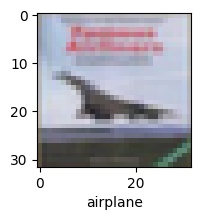

In [54]:
plot_sample(X_test,y_test,3)

In [50]:
classes[y_classes[3]]

'airplane'